
<font size="5">**<center> ĐỒ ÁN CUỐI KỲ </center>** </font>

<font size="4">**<center> Lập trình cho khoa học dữ liệu </center>** </font>

> Họ tên: Thái Bá Sơn

> MSSV: 1712732

## Dữ liệu

### Thông tin về dữ liệu:


Dữ liệu này cung cấp thành tích học tập và các thông tin liên quan của học sinh trung học ở 2 trường của Bồ Đào Nha. Cụ thể các thuộc tính dữ liệu bao gồm điểm tổng kết, yếu tố tác động như tình trạng, hoàn cảnh gia đình... được thu thập bằng cách sử dụng thông tin mà nhà trường cung cấp và phiếu khảo sát từ các học sinh.  

**Nguồn:** dữ liệu được lấy [tại đây](https://www.kaggle.com/dipam7/student-grade-prediction)

### Khám phá dữ liệu:

### Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
df_s = pd.read_csv('datasets_student_mat.csv')
df_s.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Thông tin thuộc tính:

In [3]:
num_rows, num_cols = df_s.shape
print("Dữ liệu có {} dòng, {} cột.".format(num_rows, num_cols))

Dữ liệu có 395 dòng, 33 cột.


Thông tin thuộc tính:
- **school**: Trường mà học sinh đang theo học (2 trường: 'GP' - Gabriel Pereira hoặc 'MS' - Mousinho da Silveira).
- **sex**: giới tính của học sinh (nhị phân: 'F' - nữ hoặc 'M' - nam).
- **age**: tuổi của học sinh (số: từ 15 đến 22).
- **address**: loại địa chỉ nhà của sinh viên (nhị phân: 'U' - thành thị hoặc 'R' - nông thôn).
- **famsize**: quy mô gia đình (nhị phân: 'LE3' - nhỏ hơn hoặc bằng 3 hoặc 'GT3' - lớn hơn 3).
- **Pstatus**: tình trạng chung sống của cha mẹ (nhị phân: 'T' - sống chung hoặc 'A' - xa nhau).
- **Medu**: giáo dục của mẹ (số: 0 - không, 1 - giáo dục tiểu học (lớp 4), 2 - lớp 5 đến lớp 9, 3 - giáo dục trung học hoặc 4 - giáo dục đại học).
- **Fedu**: trình độ học vấn của bố (số: 0 - không, 1 - giáo dục tiểu học (lớp 4), 2 - lớp 5-9, 3 - giáo dục trung học hoặc 4 - giáo dục đại học).
- **Mjob**: công việc của mẹ (danh nghĩa: 'giáo viên', 'liên quan đến chăm sóc sức khỏe', 'dịch vụ dân sự' (ví dụ: hành chính hoặc cảnh sát), 'at_home' hoặc 'other').
- **Fjob**: công việc của bố (danh nghĩa: 'giáo viên', 'y tế' liên quan đến chăm sóc, 'dịch vụ dân sự' (ví dụ: hành chính hoặc cảnh sát), 'at_home' hoặc 'other').
- **reason**: lý do để chọn trường này (danh nghĩa: gần 'nhà', trường 'danh tiếng', ưu tiên 'khóa học' hoặc 'trường khác').
- **guardian**: người giám hộ của học sinh (danh nghĩa: 'mẹ', 'bố' hoặc 'người khác').
- **traveltime**: hời gian di chuyển từ nhà đến trường (số: 1 - 1 giờ).
- **studytime**: thời gian học hàng tuần (số: 1 - 10 giờ).
- **failures**: số lần bị phạt (phạm lỗi) ở lớp trước đây (số: n nếu 1 <= n <3, khác 4).
- **schoolsup**: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.
- **famsup**: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.
- **paid**:  Tham gia các lớp học thêm có tính phí (Toán hoặc tiếng Bồ Đào Nha) (nhị phân: có hoặc không)
- **nursery**: Đã học qua mẫu giáo hay chưa (nhị phân: 'yes' hoặc 'no').
- **higher**: muốn tiếp tục học lên cao hơn (nhị phân: 'yes' hoặc 'no').
- **internet**: Nhà có internet hay chưa (nhị phân: 'yes' hoặc 'no').
- **activities**: Tham gia hoạt động ngoại khóa (nhị phân: 'yes' hoặc 'no').
- **romantic**: Đang trong mối quan hệ? yêu đương? (nhị phân: 'yes' hoặc 'no').
- **famrel**: Mức độ hạnh phúc của gia đình (số: từ 1 - rất thấp đến 5 - rất cao).
- **freetime**: thời gian rảnh sau giờ học (số: từ 1 - rất thấp đến 5 - rất cao).
- **goout**: Có đi chơi với bạn bè (số: từ 1 - rất ít đến 5 - rất nhiều).
- **Dalc**: Mức tiêu thụ rượu trong ngày làm việc (số: từ 1 - rất thấp đến 5 - rất cao).
- **Walc**: mức tiêu thụ rượu vào cuối tuần (số: từ 1 - rất thấp đến 5 - rất cao).
- **health**: tình trạng sức khỏe hiện tại (số: từ 1 - rất tệ đến 5 - rất tốt).
- **absences**: vắng mặt - số lần nghỉ học (số: từ 0 đến 93).

## Tiền xử lý:

- Kiểm tra dữ thông tin dữ liệu: kiểu dữ liệu của các thuộc tính, các cột có bị thiếu giá trị hay không?...

In [4]:
#xem thông tin data:
df_s.info()

if df_s.isnull().values.any() == False:
    print("=> Không có ô giá trị nào bị thiếu.")
else:
    print("Dữ liệu bị thiếu.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

- Xóa cột thuộc tính không dùng đến: school, age.

In [5]:
df_s.drop(['school'], 1, inplace=True)

### Phân loại bảng điểm:

In [6]:
def grade(data):
    temp = []
    grade_C = 10
    grade_B = 15
    data['G_avg'] = (data['G1'] + data['G2'] + data['G3'])/3
    for r in data['G_avg']:
        if r < grade_C:
            temp.append('C')
        elif r < grade_B:
            temp.append('B')
        else:
            temp.append('A')
    data['Grade'] = temp
    return data
df_s = grade(df_s)
df_s.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg,Grade
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,1,1,3,6,5,6,6,5.666667,C
1,F,17,U,GT3,T,1,1,at_home,other,course,...,3,1,1,3,4,5,5,6,5.333333,C
2,F,15,U,LE3,T,1,1,at_home,other,other,...,2,2,3,3,10,7,8,10,8.333333,C
3,F,15,U,GT3,T,4,2,health,services,home,...,2,1,1,5,2,15,14,15,14.666667,B
4,F,16,U,GT3,T,3,3,other,other,home,...,2,1,2,5,4,6,10,10,8.666667,C


# Đặt câu hỏi:
- 1. Liệu trình độ học vấn của cha mẹ có ảnh hưởng đến thành tích học tập của con ở trường hay không?

- 2. Yếu tố tác động tích cực và tiêu cực đến kết quả học tập?

- 3. Có phải hầu hết học sinh đến từ thành thị? Vậy học sinh thành thị có học tốt hơn học sinh nông thôn hay không?

- 4. (Note)

- 5. Tình trạng uống rượu bia theo lứa tuổi của học sinh ở Bồ Đào Nha?


# Trả lời câu hỏi:

---

- **<font color=red> 1. Liệu trình độ học vấn của cha mẹ có ảnh hưởng đến thành tích học tập của con ở trường hay không? </font>**

<BarContainer object of 8 artists>

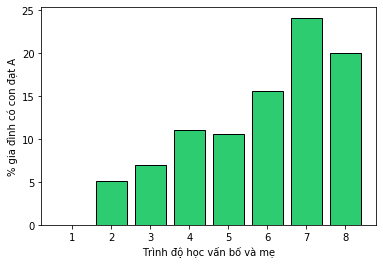

In [7]:
#df_1: copy df_s dùng cho câu 1
df_1 =  df_s.copy()

#Thêm cột học vấn tổng của bố và mẹ
df_1['Fa_edu'] = df_1['Medu'] + df_1['Fedu']
fa_edu = df_1['Fa_edu'].value_counts()

#Lọc dataframe chỉ chứa học sinh đạt điểm A
df_temp = df_1[df_1['Grade'].str.contains('A')]
fa_edu_A = df_temp['Fa_edu'].value_counts()

#Tính % và vẽ biểu đồ
df_f = fa_edu_A/fa_edu * 100
df_f = df_f.replace(np.nan, 0)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('% gia đình có con đạt A')
ax.set_xlabel('Trình độ học vấn bố và mẹ', fontsize='medium')
ax.bar(df_f.index, df_f.values, fill='black', color="#2ecc71", edgecolor=['black'])

**Kết luận:** Dựa vào biểu đồ trên, ta thấy biểu đồ có xu hướng tăng dần qua các mốc học vấn của cha mẹ, có thể nói cha mẹ càng có học vấn cao thì con của họ càng giỏi. Kết quả này thu được có thể do gen di truyền từ bố mẹ và môi trường học tập mà con cái nhận được sự quan tâm, chỉ bảo từ gia đình. 

---

- **<font color=red> 2. Yếu tố tác động tích cực và tiêu cực đến kết quả học tập? </font>**

In [8]:
df_2 = df_s.copy().select_dtypes('int64')

df_2 = df_2[['famrel', 'studytime', 'failures', 'absences', 'G1', 'G2','G3']]

# sklearn needs numpy array's as inputs
X = np.array(df_2.drop('G3', axis=1))
y = np.array(df_2['G3'])

df_2.head()

,famrel,studytime,failures,absences,G1,G2,G3
0,4,2,0,6,5,6,6
1,5,2,0,4,5,5,6
2,4,2,3,10,7,8,10
3,3,3,0,2,15,14,15
4,4,2,0,4,6,10,10


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [10]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#Xuất thông tin về độ hiệu quả của thuật toán:
print("Hiệu quả: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for i in range(len(coeff)):
    print(df_2.columns[i], ': ', coeff[i])
print('Độ dốc', intercept)

Hiệu quả:  0.8316968124174094
famrel :  0.5675565229094426
studytime :  -0.46968540367725004
failures :  -0.5180844666140697
absences :  0.029015504354730607
G1 :  0.11790811767680966
G2 :  0.954990328569435
Độ dốc -2.3293128685712166


**Kết luận:** Ta đưa ra nhận xét dựa vào hững thuộc tính cho ra kết quả dương (tích cực) và âm (tiêu cực):

Dễ thấy điểm thi ở đợt kiểm tra cuối (**G3**) chịu tác động tích cực từ mức độ hạnh phúc của gia đình (**famrel**), kết quả thi đợt 1 (**G1**) và kết quả thi đợt 2 (**G3**). Nghĩa là nếu những yếu tố này càng cao thì có thể kết quả thi **G3** càng tốt. Ví dụ 1 học sinh có thể cố gắng hơn nếu điểm **G1** và **G2** của học sinh đó chưa đạt được như nguyện vọng. 

Yếu tố tiêu cực **failures** (số lỗi vi phạm) là điều dễ hiểu vì chỉ số này ít khi xuất hiện ở 1 học sinh học lực tốt. Nhưng điều lạ ở đây là thuộc tính **studytime** (thời gian học tập) lại là tiêu cực... kết quả này đi ngược với suy nghĩ "học càng nhiều thì càng tốt", nó đúng hơn với câu "học quá nhiều chưa hẳn là tốt".

---

- **<font color=red> 3. Hầu hết học sinh đến từ thành thị, nhưng học sinh thành thị có học tốt hơn học sinh nông thôn hay không? </font>**

Để kiểm chứng, đầu tiên ta đưa ra dẫn chứng về số học sinh ở thành thị và số học sinh ở nông thôn:

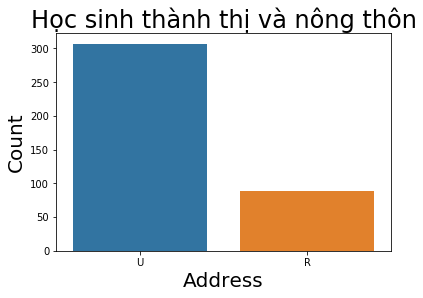

In [12]:
c_3 = sns.countplot(df_s['address'])
c_3.axes.set_title('Học sinh thành thị và nông thôn', fontsize = 24)
c_3.set_xlabel('Address', fontsize = 20)
c_3.set_ylabel('Count', fontsize = 20)
plt.show()

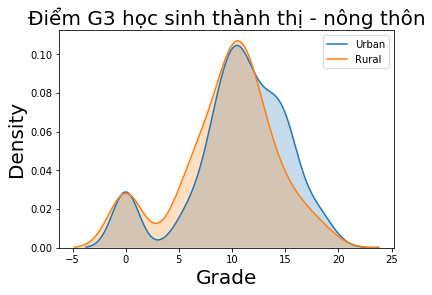

In [13]:
sns.kdeplot(df_s.loc[df_s['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(df_s.loc[df_s['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Điểm G3 học sinh thành thị - nông thôn', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

**Kết luận:** Nhìn vào biểu đồ, ta thấy học lực giữa thành thị và nông thôn không chênh lệch quá nhiều. Tuy nhiên học sinh thành thị vẫn nhỉnh hơn từ mức điểm B trở lên ($>10$). Điều kiện học tập ở mỗi nơi là khác nhau nên chênh lệch là khó tránh khỏi.

---

- **<font color=red> 4.(Note) </font>**

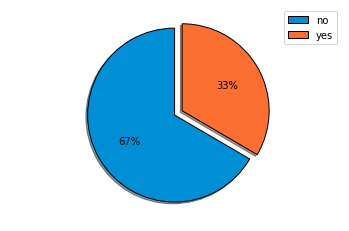

In [14]:
#Lấy series của cột romatic
df_4 = df_s['romantic'].copy().value_counts()

#Trực quan %
plt.axis('equal');
# colors = ['#008fd5', '#fc4f30']
colors = ['#008fd5', '#fc6f30']
plt.pie(df_4, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, 
        explode = (0, 0.1), autopct='%1.f%%',shadow=True);
plt.legend(loc='best', labels=df_4.index, fontsize='medium')
plt.show()

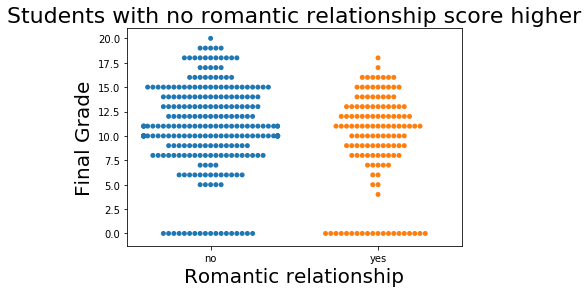

In [22]:
b = sns.swarmplot(x=df_s['romantic'],y=df_s['G3'])
b.axes.set_title('Students with no romantic relationship score higher', fontsize = 22)
b.set_xlabel('Romantic relationship', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

**Kết luận:** (Note).

---

- **<font color=red> 5. Tình trạng uống rượu bia theo lứa tuổi của học sinh ở Bồ Đào Nha? </font>**

Để giải quyết câu hỏi này, ta cần quan tâm đến 2 cột thuộc tính **Dalc** và **age**. 

\- Đầu tiên ta rút ra số lượng của các nhãn rời rạc trong cột **Dalc** dưới dạng Series. 

In [16]:
#Lấy series của cột Dalc
se_dalc = df_s['Dalc'].copy().value_counts()
print("Thống kê số lượng của các nhãn rời rạc trong cột Dalc\n")
se_dalc

Thống kê số lượng của các nhãn rời rạc trong cột Dalc



1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64

\- Sau đó trực quan bằng Pie Chart như sau:

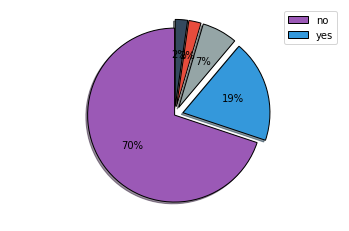

In [17]:
#Trực quan %
plt.axis('equal')

colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]
plt.pie(se_dalc, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, 
        explode = (0, 0.1,0.1,0.1,0.1), autopct='%1.f%%',shadow=True);
plt.legend(loc='best', labels=df_4.index, fontsize='medium')
plt.show()

\- Qua số liệu của cột **Dalc** thì mức dộ sử dụng rượu/bia được đánh giá theo thang từ 1 - *rất ít*, đến 5 - *rất nhiều*. Do đó ta đặt mức lớn hơn 1 (**Dalc** $\ge$ 2) làm mốc đánh giá là có sử dụng rượu/bia. Tạo bảng dữ liệu gồm 2 cột **age** và **Dalc** vừa lọc ra ở trên.


In [18]:
df_5 = df_s[df_s['Dalc'] > 1]
df_5 = df_5[['age','Dalc']]
df_5.head()

,age,Dalc
2,15,2
18,17,2
23,16,2
27,15,2
29,16,5


\-  Tiếp đến, ta cần đưa ra số liệu thống kê về số học sinh sử dụng rượu/bia theo độ tuổi bằng cách xây dựng hàm <font color=blue> count_age_acl </font>. Với đầu vào là DataFrame đang xét (df_5) và Series của cột **age**. Kết quả trả về một Series có Index là độ tuổi và Value là số học sinh sử dụng rượu/bia. 

In [19]:
def count_age_acl(dataframe, series):
    #Sắp xếp lại giá trị index của series theo chiều tăng của tuổi.
    series.sort_index(inplace = True)
    
    #Danh sách các số đếm của từng độ tuổi.
    acl_list = []
    num = 0
    for i in series.index:
        num = len(dataframe[dataframe['age'] == i])
        print(num)
        acl_list.append(num)
    
    #Thay đổi values của của series theo act_list ở trên
    series.replace(series.values, acl_list, inplace = True)
    return series

In [20]:
se_age = df_s.copy()['age'].value_counts()
se_age = count_age_acl(df_5, se_age)
se_age

20
28
33
28
7
1
1
1


15    28
16    28
17    33
18    28
19     7
20     1
21     1
22     1
Name: age, dtype: int64

\- Trực quan dưới dạng biểu đồ đường:

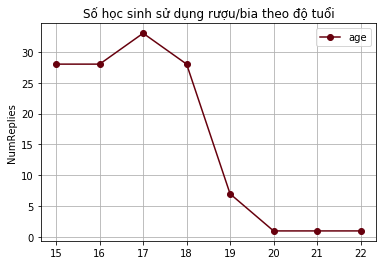

In [21]:
title = "Số học sinh sử dụng rượu/bia theo độ tuổi"
se_age.plot(kind = 'line', marker='o', title = title, grid = True, legend = True, colormap = 'Reds_r')
plt.ylabel('NumReplies');

**Kết luận:** Nhìn vào biểu đồ, ta thấy mức độ sử dụng rượu bia ở các lứa tuổi khá chênh nhau. Lứa tuổi từ 15-18 sử dụng rượu bia rất nhiều, nhất là những học sinh 17 tuổi. Theo như mình tìm hiểu thì độ tuổi được phép uống rượu/bia ở Bồ Đào Nha là 16 đối với loại nhẹ và 18 đối với loại rượu nặng (tham khảo [ở đây](https://www.apyn.org/triangle-portugal#:~:text=There%20are%20now%20two%20legal,of%20alcoholic%20beverages%20(spirits).) \), nên thống kê trên là đáng báo động vì ở độ tuổi 15, các bạn đã tiêu thụ rượu khá nhiều... Mức tiêu thụ này giảm dần từ lứa tuổi 19 trở đi, dù độ tuổi này việc sử dụng chất có cồn đã được hợp pháp hóa.